# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [495]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [471]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [474]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [475]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [476]:
# Acá realizá la predicción
y_pred = dtr.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [477]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error

tree_mse_pred = mean_squared_error(y_test, y_pred)
print("RMSE Entrenamiento: ", np.sqrt(tree_mse_pred))

RMSE Entrenamiento:  24895.588784667714


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [478]:
rmses_train=[]
rmses_test=[]

c=0
while c<30:
    c=c+5    
    dtr2 = DecisionTreeRegressor(max_depth=c)
    dtr2.fit(X_train, y_train)
    tree_reg_p = dtr2.predict(X_train)
    tree_mse_p = mean_squared_error(y_train, tree_reg_p)

    tree_reg_t = dtr2.predict(X_test)
    tree_m = mean_squared_error(y_test, tree_reg_t)
    
    rmses_train.append(np.sqrt(tree_mse_p))
    rmses_test.append(np.sqrt(tree_m))

print(rmses_train)
print(rmses_test)

[21170.403344931623, 15507.091906682095, 7915.502860248083, 2468.600495332305, 675.9552664115744, 526.3339719538154]
[22247.803452301796, 21708.025550129398, 24123.41222614817, 25239.732125600385, 24840.730535892282, 25093.768808858138]


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

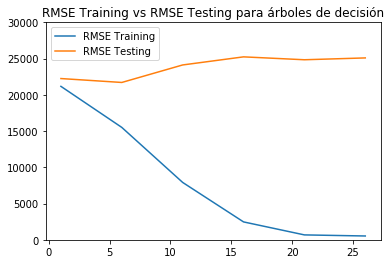

In [479]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [480]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_knn_tr_pred = knn.predict(X_train)
y_knn_pred = knn.predict(X_test)

tree_mse_knn = mean_squared_error(y_test, y_knn_pred)
tree_mse_tr_knn = mean_squared_error(y_train, y_knn_tr_pred)
print("RMSE KNN - TEST: ", np.sqrt(tree_mse_knn))
print("RMSE KNN - TRAIN: ", np.sqrt(tree_mse_tr_knn))

RMSE KNN - TEST:  22733.040368844526
RMSE KNN - TRAIN:  18751.379229464594


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [481]:
# Calculá los cambio en el rmse en esta celda
rmses_train=[]
rmses_test=[]

c=0
while c<6:
    c=c+1
    
    knn = KNeighborsRegressor(c)
    knn.fit(X_train, y_train)

    knn_test_pred = knn.predict(X_test)
    knn_train_pred = knn.predict(X_train)

    tree_mse_knn = mean_squared_error(y_test, knn_test_pred)
    tree_mse_tr_knn = mean_squared_error(y_train, knn_train_pred)    

    rmses_test.append(np.sqrt(tree_mse_knn))
    rmses_train.append(np.sqrt(tree_mse_tr_knn))

print(rmses_train)
print(rmses_test)

[717.7083160050084, 13746.009016313237, 16557.178260577828, 17829.292761243214, 18751.379229464594, 19293.814806681385]
[26314.375047026846, 24378.43157503682, 23324.776048948213, 23028.274549889524, 22733.040368844526, 22731.27025782464]


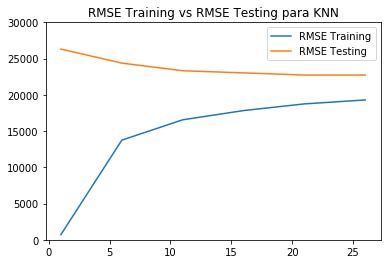

In [482]:
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [483]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [491]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)
scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

print(nmsq2rmse(scores).mean())

21973.588042821826



Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [492]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [493]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [494]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,108426.872,28426.872
1,128000.000,151372.531,23372.531
2,150000.000,151372.531,1372.531
3,85000.000,99219.122,14219.122
4,135000.000,130337.039,4662.961
5,135000.000,119967.914,15032.086
6,68000.000,87243.666,19243.666
7,110000.000,128379.238,18379.238
8,134000.000,154167.172,20167.172
9,110000.000,85248.777,24751.223
